In [5]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
column_names = ['Suit1', 'Rank1', 'Suit2', 'Rank2', 'Suit3', 'Rank3', 'Suit4', 'Rank4', 'Suit5', 'Rank5', 'Hand']
df = pd.read_csv(url, names=column_names)

# Display basic information about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Suit1   25010 non-null  int64
 1   Rank1   25010 non-null  int64
 2   Suit2   25010 non-null  int64
 3   Rank2   25010 non-null  int64
 4   Suit3   25010 non-null  int64
 5   Rank3   25010 non-null  int64
 6   Suit4   25010 non-null  int64
 7   Rank4   25010 non-null  int64
 8   Suit5   25010 non-null  int64
 9   Rank5   25010 non-null  int64
 10  Hand    25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB
None


Suit1    0
Rank1    0
Suit2    0
Rank2    0
Suit3    0
Rank3    0
Suit4    0
Rank4    0
Suit5    0
Rank5    0
Hand     0
dtype: int64


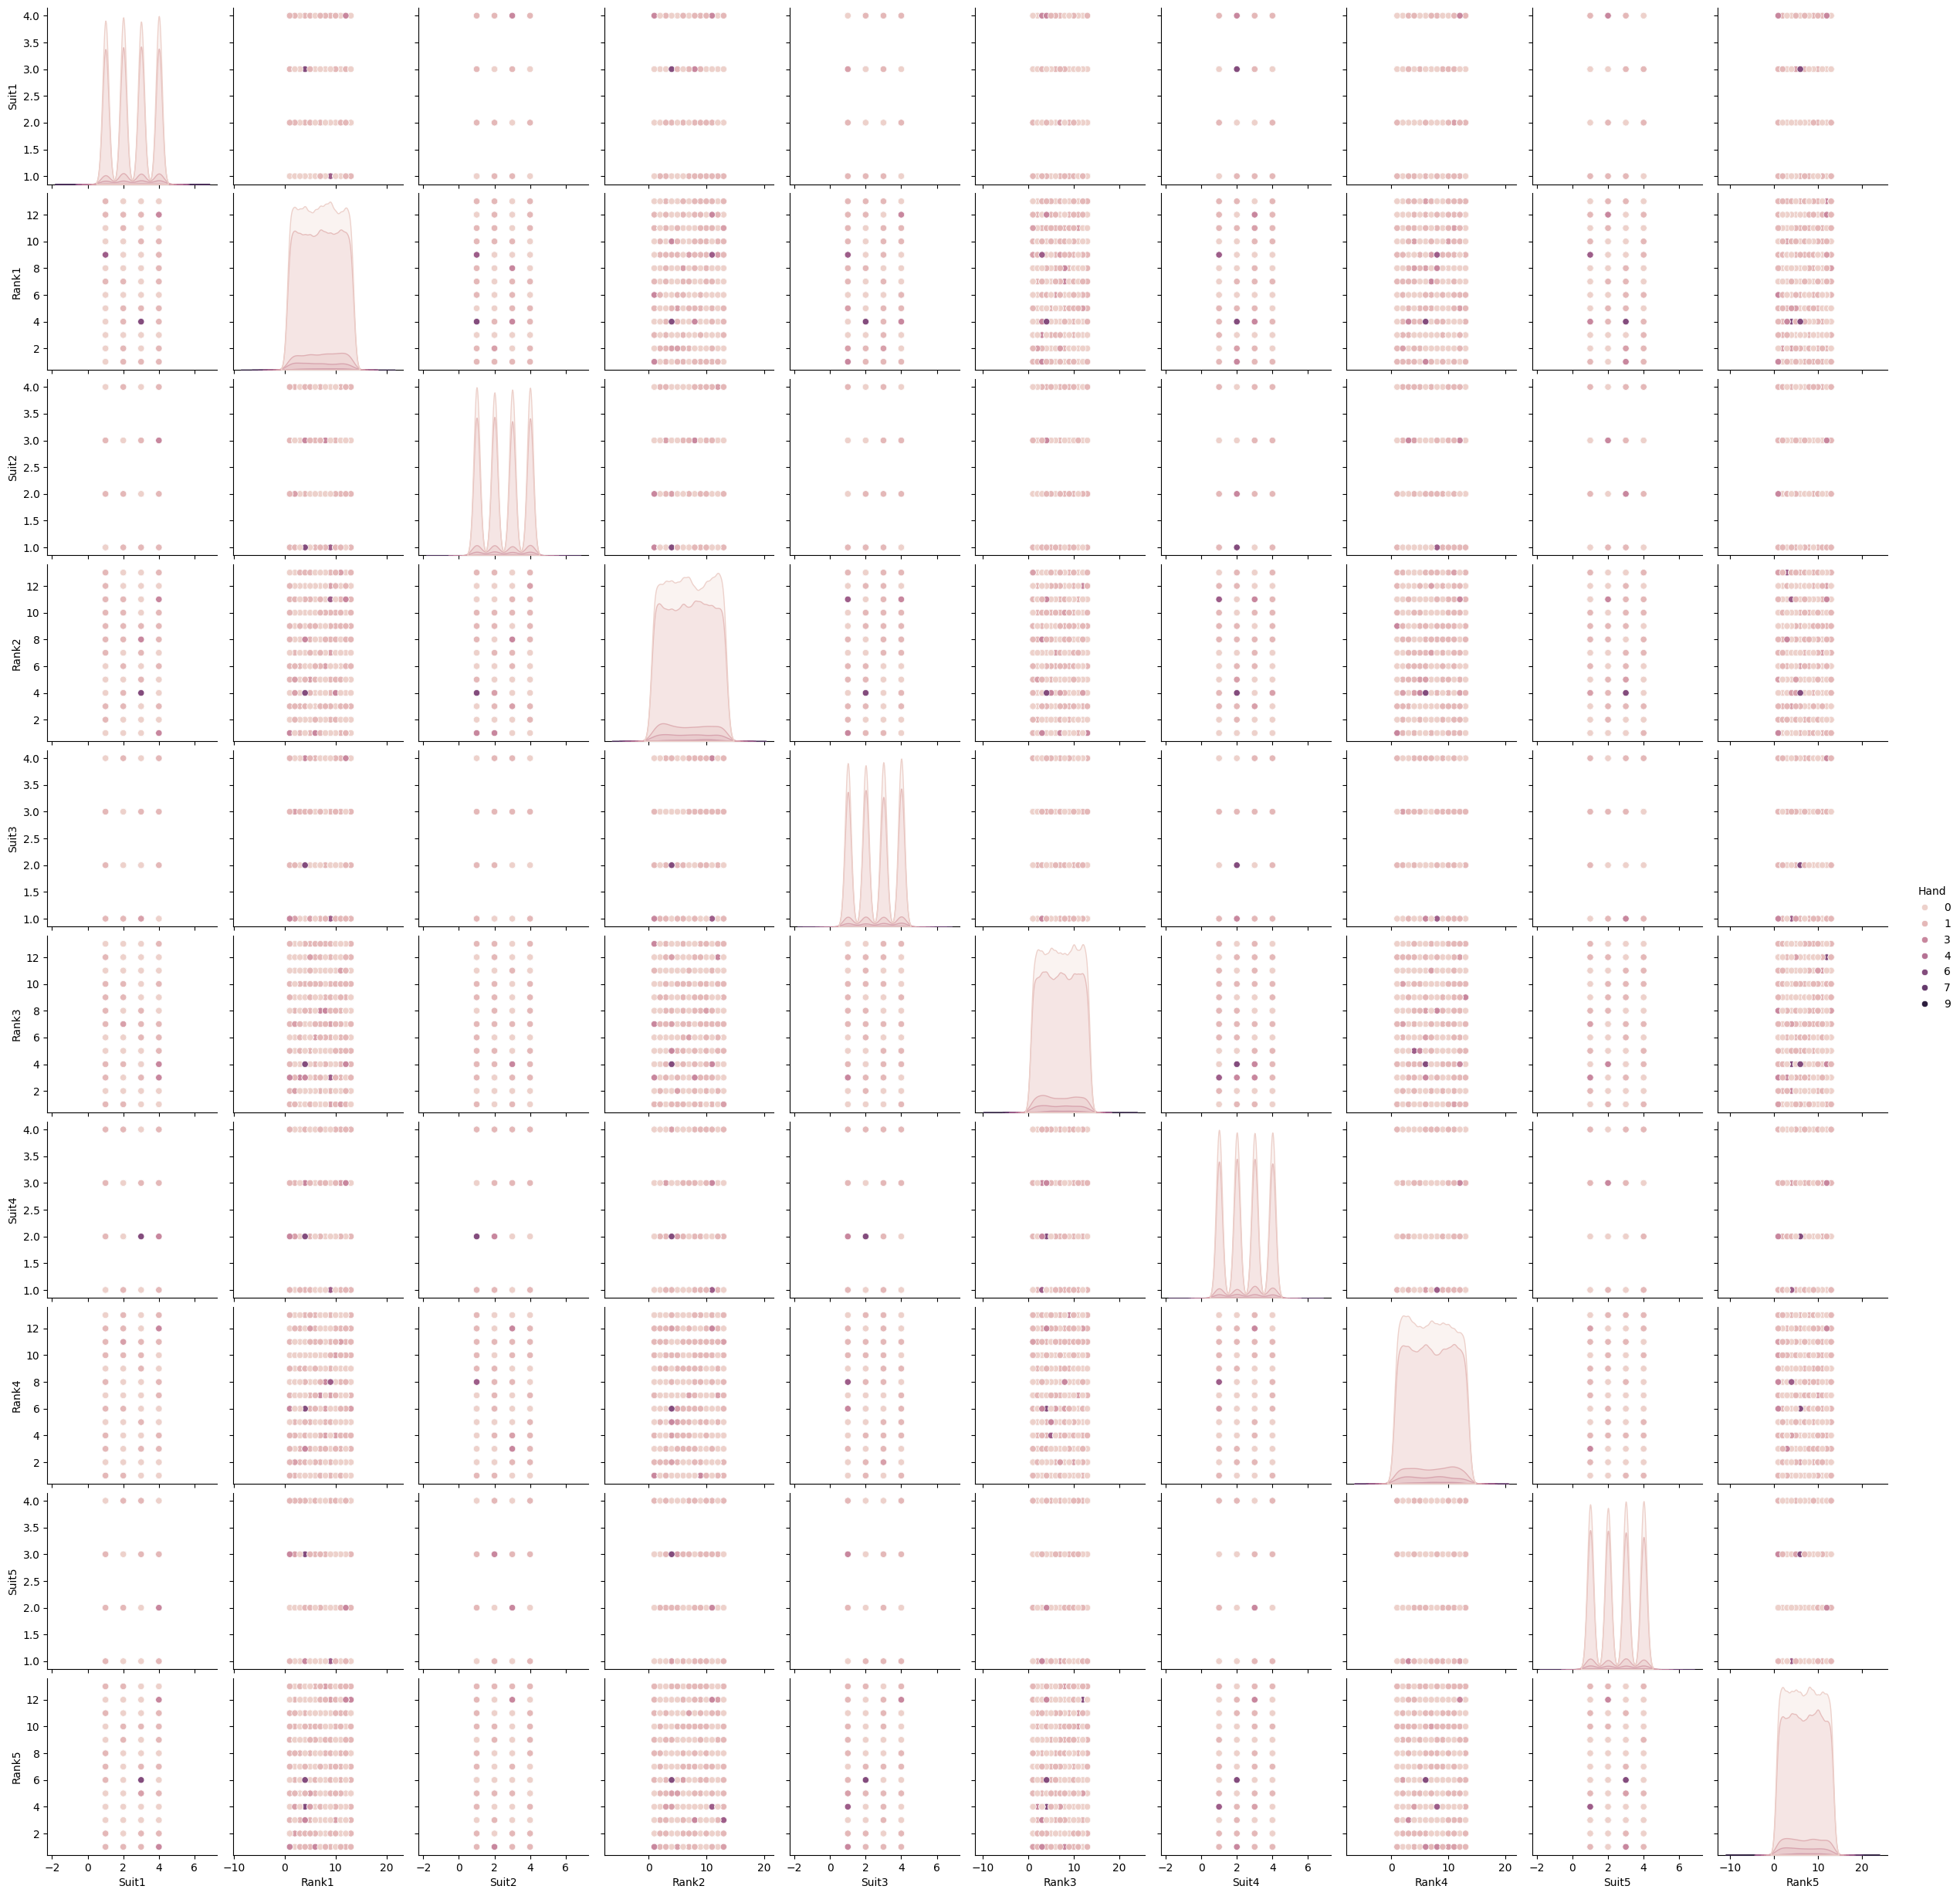

In [6]:
# Check for missing values
print(df.isna().sum())

# Replace '?' with NaN and drop rows with missing values
df = df.replace(b'?', np.nan).dropna()

# Convert columns to appropriate data types
df = df.astype(int)

# EDA: Pairplot
sns.pairplot(df, hue='Hand', diag_kind='kde')
plt.show()

### Train Test split & model fitting

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numerical labels
y = label_encoder.fit_transform(df['Hand'])

# Verify the numerical labels
print(y)

[9 9 9 ... 1 1 1]


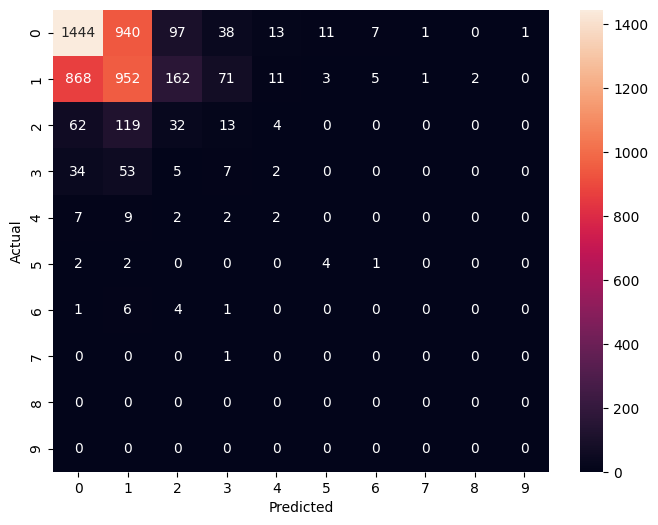

              precision    recall  f1-score   support

           0       0.60      0.57      0.58      2552
           1       0.46      0.46      0.46      2075
           2       0.11      0.14      0.12       230
           3       0.05      0.07      0.06       101
           4       0.06      0.09      0.07        22
           5       0.22      0.44      0.30         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.49      5002
   macro avg       0.15      0.18      0.16      5002
weighted avg       0.50      0.49      0.49      5002

Feature Importance:
   Feature Importance
0            0.060401
1            0.149107
2            0.072362
3            0.134116
4            0.038919
5            0.142427
6            0.073659
7            0.146577
8            0.032140
9

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import requests
from io import StringIO

# Load data from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
response = requests.get(url)
data = StringIO(response.text)
df = pd.read_csv(data, header=None)

# Convert to appropriate data types
df = df.astype(int)

# Splitting the data into features (X) and target (y)
X = df.drop(10, axis=1)  # Assuming the target column is at index 10
y = df[10]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model fitting
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction
base_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, base_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, base_pred))

# Feature Importance
print("Feature Importance:")
print(pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']))


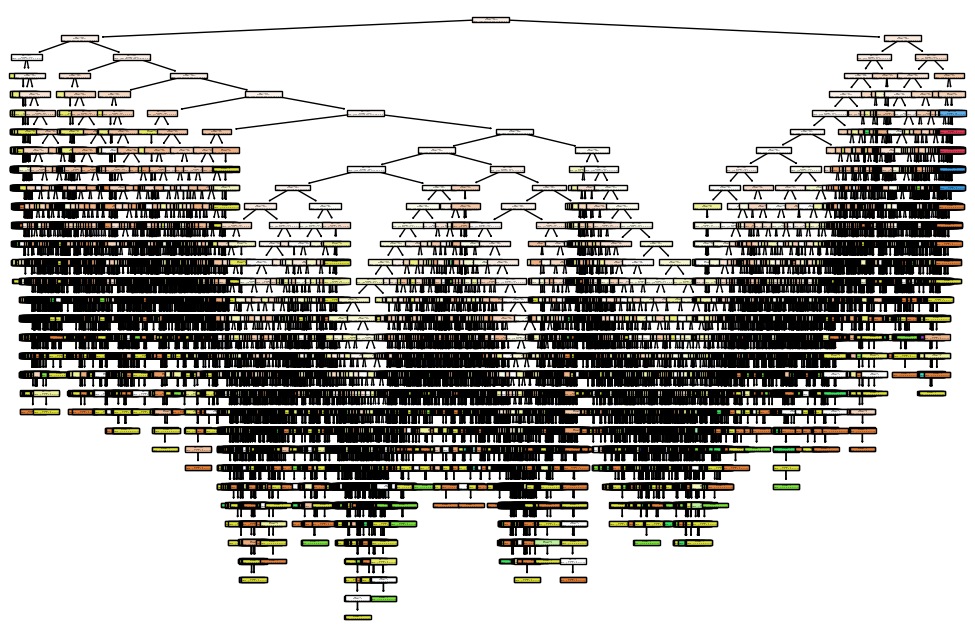

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.57      0.58      2552
           1       0.46      0.46      0.46      2075
           2       0.11      0.14      0.12       230
           3       0.05      0.07      0.06       101
           4       0.06      0.09      0.07        22
           5       0.22      0.44      0.30         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.49      5002
   macro avg       0.15      0.18      0.16      5002
weighted avg       0.50      0.49      0.49      5002



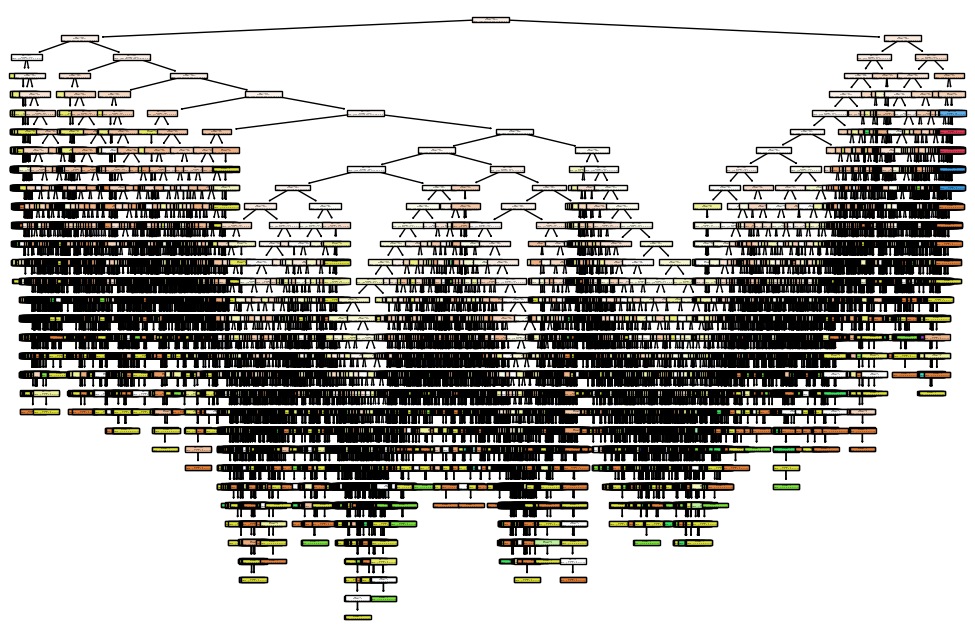

In [12]:
def report_model(model, X_test, y_test, feature_names):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=feature_names)
    plt.show()

report_model(model, X_test, y_test, X.columns)

### Pruning

Pruned Tree (max_depth=2):
              precision    recall  f1-score   support

           0       0.51      0.95      0.66      2552
           1       0.42      0.06      0.10      2075
           2       0.00      0.00      0.00       230
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1

    accuracy                           0.51      5002
   macro avg       0.12      0.13      0.10      5002
weighted avg       0.44      0.51      0.38      5002



C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


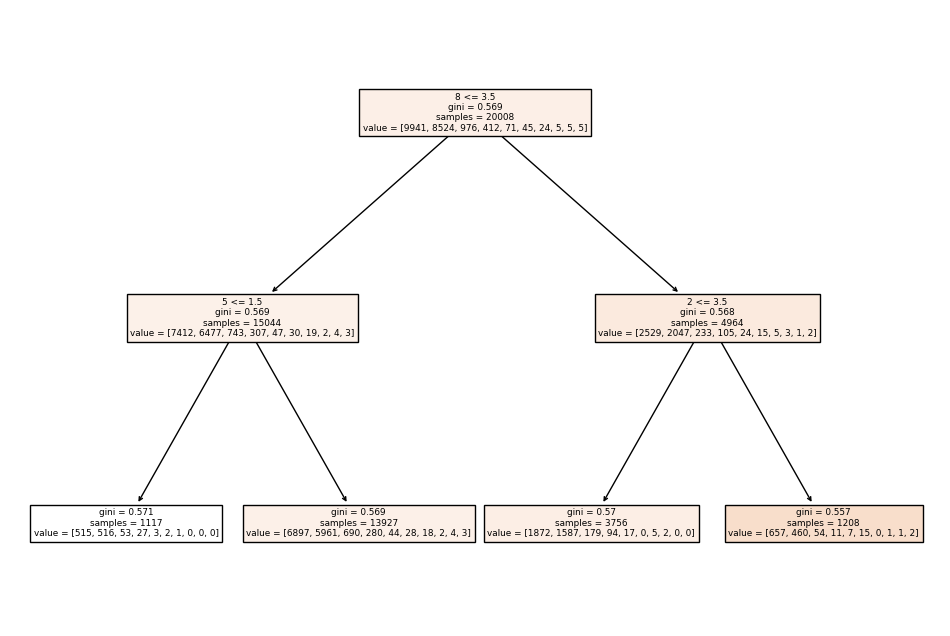

Pruned Tree (max_leaf_nodes=3):
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      2552
           1       0.00      0.00      0.00      2075
           2       0.00      0.00      0.00       230
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1

    accuracy                           0.51      5002
   macro avg       0.06      0.12      0.08      5002
weighted avg       0.26      0.51      0.34      5002



C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


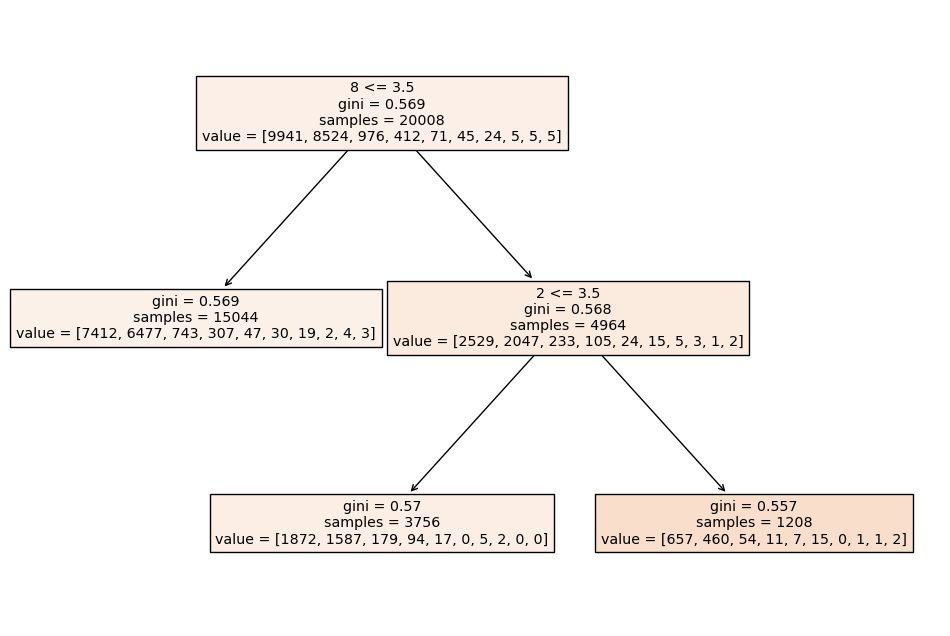

Pruned Tree (entropy criterion):
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      2552
           1       0.47      0.48      0.47      2075
           2       0.11      0.12      0.11       230
           3       0.09      0.10      0.09       101
           4       0.13      0.09      0.11        22
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.51      5002
   macro avg       0.14      0.14      0.14      5002
weighted avg       0.51      0.51      0.51      5002



C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\

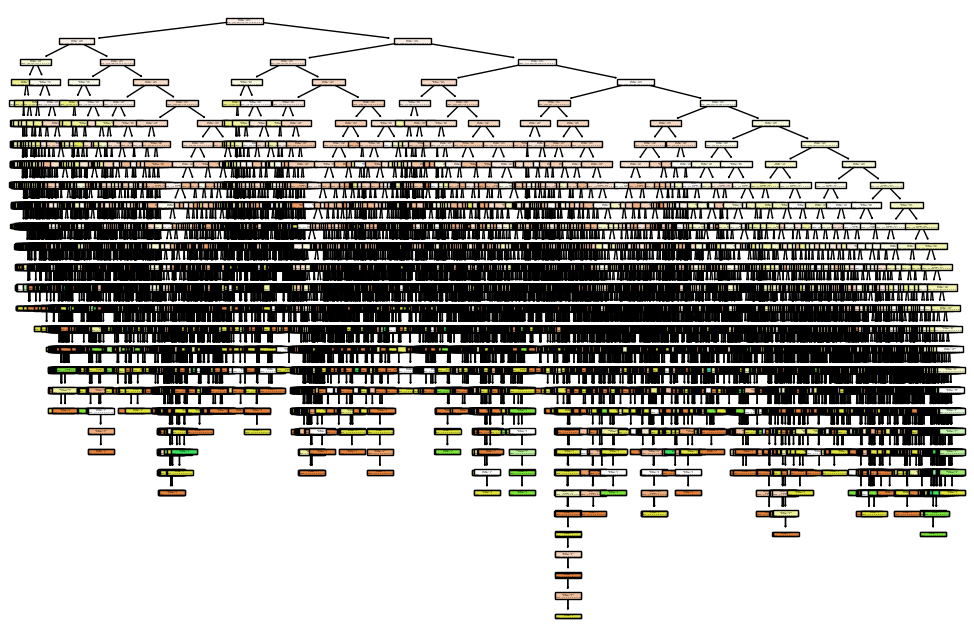

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Pruning with max_depth=2
pruned_tree_max_depth = DecisionTreeClassifier(max_depth=2)
pruned_tree_max_depth.fit(X_train, y_train)
print("Pruned Tree (max_depth=2):")
report_model(pruned_tree_max_depth, X_test, y_test, X.columns)

# Pruning with max_leaf_nodes=3
pruned_tree_max_leaf_nodes = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree_max_leaf_nodes.fit(X_train, y_train)
print("Pruned Tree (max_leaf_nodes=3):")
report_model(pruned_tree_max_leaf_nodes, X_test, y_test, X.columns)

# Pruning with entropy criterion
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train, y_train)
print("Pruned Tree (entropy criterion):")
report_model(entropy_tree, X_test, y_test, X.columns)
